<a href="https://colab.research.google.com/github/Gual-G/Stock-Prices-Analysis-and-Modeling-using-CNN_LSTM/blob/main/_analysis_of_4_stocks_and_prediction_using_cnn_lstm_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock** **Analysis** **and** **CNN-LSTM** **Prediction**

---



## 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
!pip install yfinance==0.2.40
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end, timeout=30)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.50
    Uninstalling yfinance-0.2.50:
      Successfully uninstalled yfinance-0.2.50
yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## 2. Data Information and Descriptive Statistics

In [ ]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-11-26,201.899994,208.000000,201.789993,207.860001,207.860001,41673700.0,AMAZON
2024-11-27,206.979996,207.639999,205.050003,205.740005,205.740005,28061600.0,AMAZON
2024-11-29,205.830002,208.199997,204.589996,207.889999,207.889999,24892400.0,AMAZON
2024-12-02,209.960007,212.990005,209.509995,210.710007,210.710007,39523200.0,AMAZON
2024-12-03,210.309998,214.020004,209.649994,213.440002,213.440002,32214800.0,AMAZON
2024-12-04,215.960007,220.000000,215.750000,218.160004,218.160004,48745700.0,AMAZON
2024-12-05,218.029999,222.149994,217.300003,220.550003,220.550003,41140200.0,AMAZON
2024-12-06,220.750000,227.149994,220.600006,227.029999,227.029999,44178100.0,AMAZON
2024-12-09,227.210007,230.080002,225.669998,226.089996,226.089996,46819400.0,AMAZON


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,203.825635,205.694722,202.104572,204.029920,203.541271,5.742816e+07
std,23.000742,23.235702,22.768818,23.136824,23.331772,3.050603e+07
min,165.350006,166.399994,164.080002,165.000000,164.405121,2.811130e+07
25%,183.827499,185.134995,182.204998,184.224998,183.452492,4.204280e+07
50%,198.555000,208.575005,196.580002,207.189995,206.723015,5.005840e+07
75%,225.352501,227.472496,223.672497,226.090004,225.808643,6.372982e+07
max,246.949997,248.210007,245.341995,247.770004,247.770004,3.186799e+08


In [ ]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,162.101358,163.722345,160.618452,162.171151,161.748913,1.979189e+07
std,15.017877,15.130999,14.872050,14.986048,15.026493,8.357080e+06
min,132.740005,134.020004,131.059998,132.559998,132.085388,7.409100e+06
25%,149.497494,151.152496,148.107498,149.339996,148.909950,1.456902e+07
50%,164.837502,166.454994,163.455002,164.525002,164.328575,1.757315e+07
75%,174.487499,175.887505,172.522495,173.882504,173.277390,2.158080e+07
max,191.750000,193.309998,190.619995,192.660004,192.188690,5.972800e+07


In [ ]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,416.633055,419.802143,413.021587,416.617738,414.897071,2.087208e+07
std,19.995568,20.066346,19.814173,20.030956,20.440936,7.864230e+06
min,366.850006,371.600006,364.130005,365.929993,363.213928,9.932800e+06
25%,407.959991,410.420013,404.177490,406.772499,405.248230,1.627205e+07
50%,417.789993,420.590012,413.535004,416.824997,415.536560,1.899655e+07
75%,426.480003,429.999992,423.074997,427.127502,426.064674,2.285258e+07
max,467.000000,468.350006,464.459991,467.559998,465.786438,7.847820e+07


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-12-11 to 2024-12-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## 3. Data Analysis

## A. Closing Price

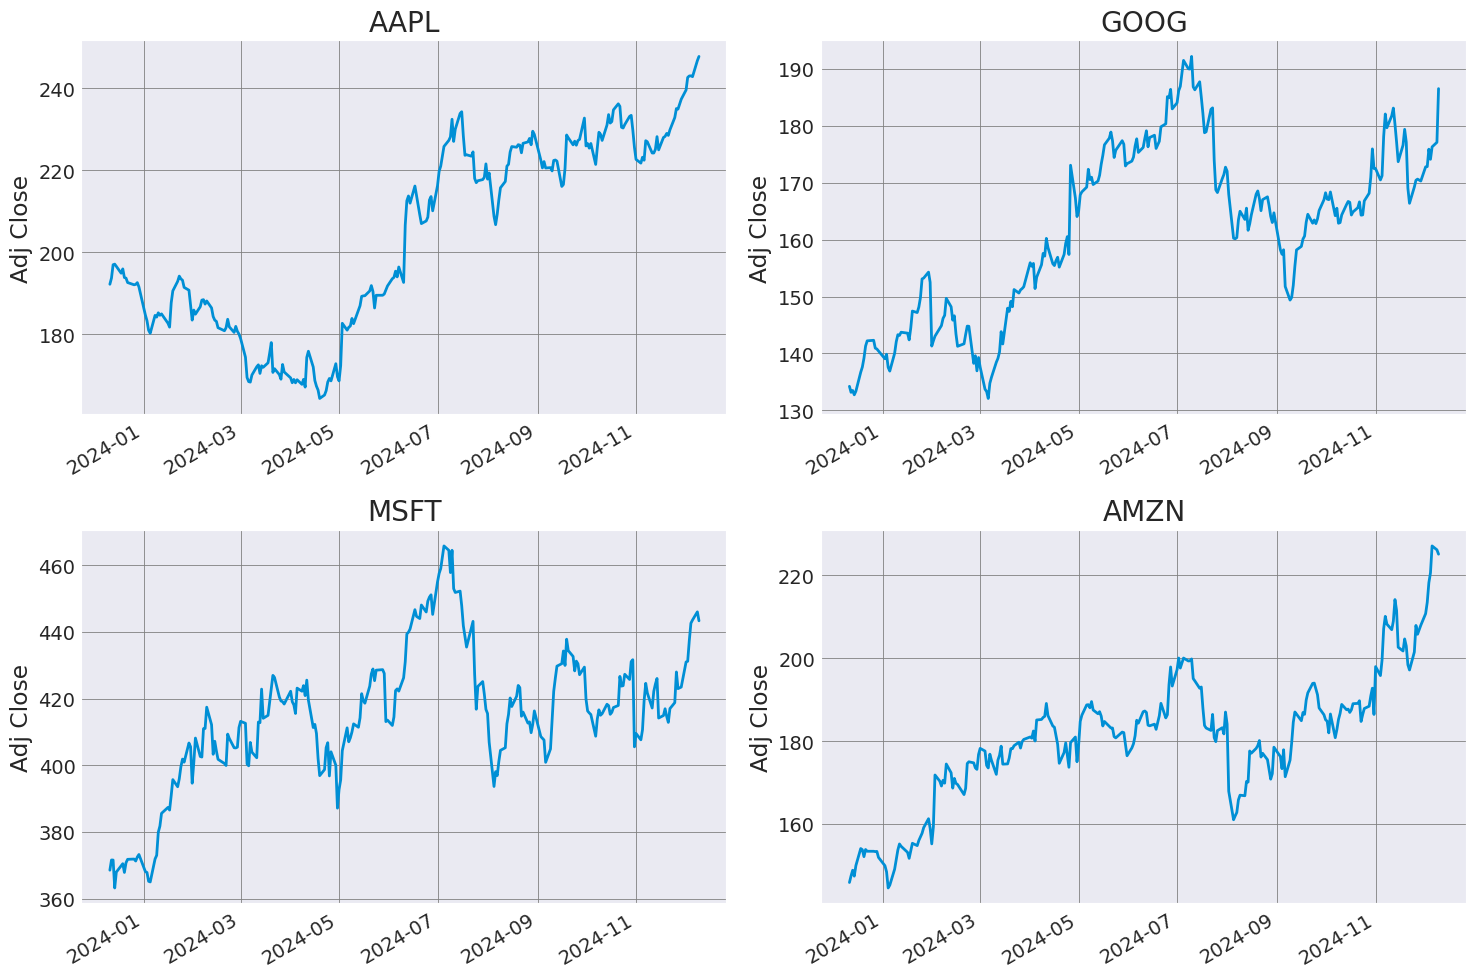

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(linewidth=2)
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")
    plt.grid(True, color='gray', linestyle='-', linewidth=0.6)

plt.tight_layout()

## B. Moving Average

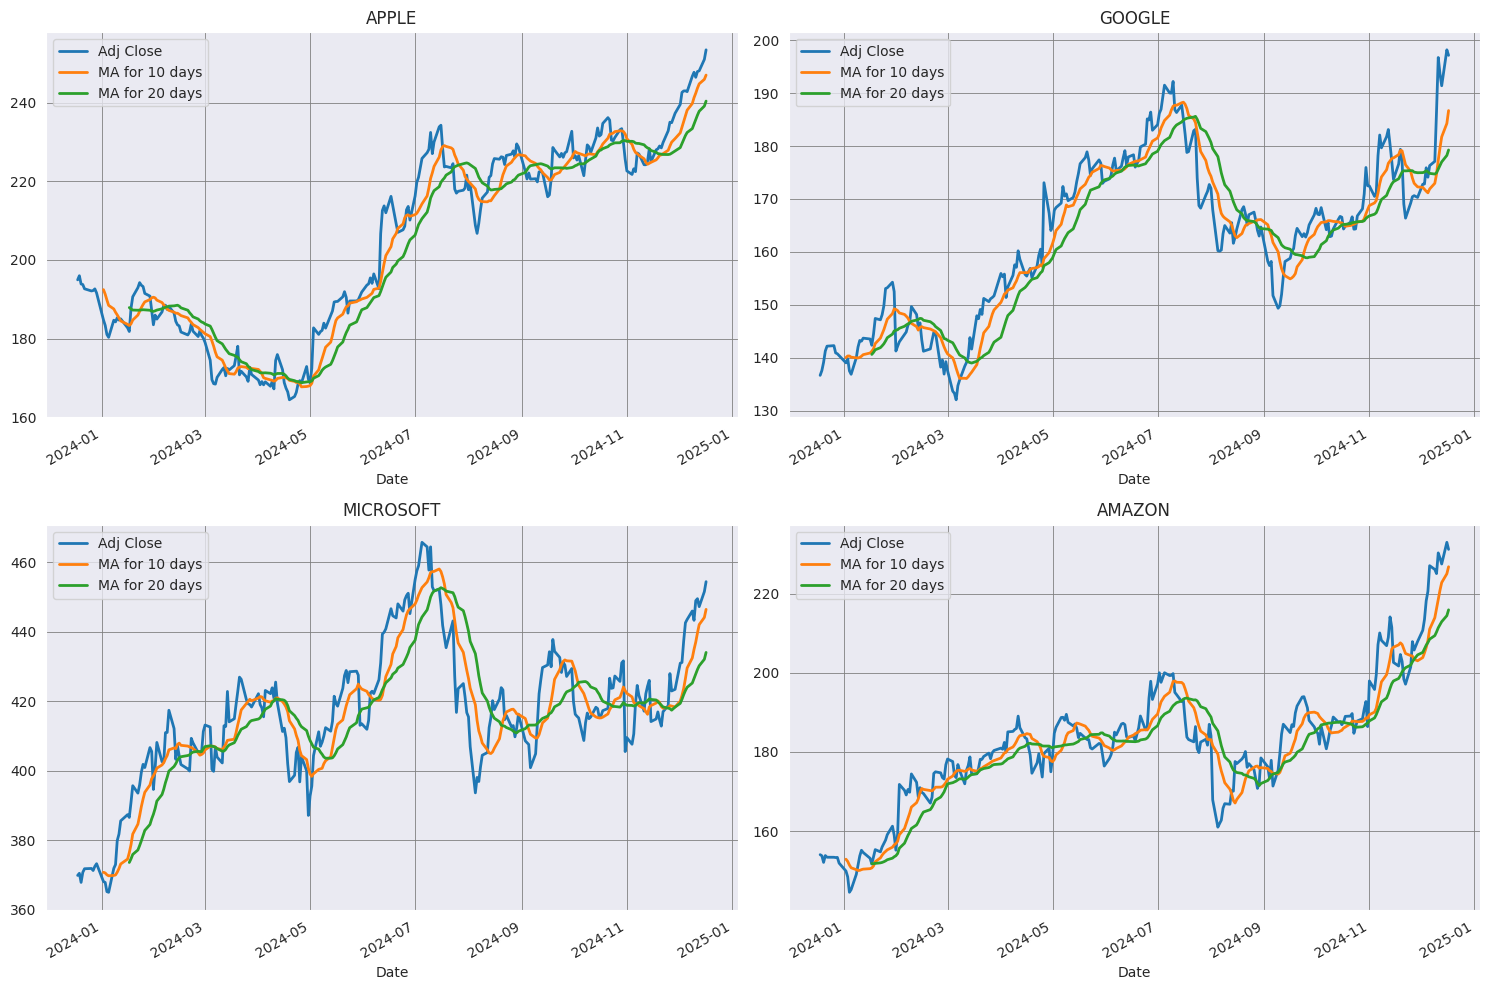

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days']].plot(ax=axes[0,0], linewidth=2,)
axes[0,0].set_title('APPLE')
axes[0,0].grid(True, color='gray', linestyle='-', linewidth=0.6)

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days']].plot(ax=axes[0,1], linewidth=2)
axes[0,1].set_title('GOOGLE')
axes[0,1].grid(True, color='gray', linestyle='-', linewidth=0.6)

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days']].plot(ax=axes[1,0], linewidth=2)
axes[1,0].set_title('MICROSOFT')
axes[1,0].grid(True, color='gray', linestyle='-', linewidth=0.6)

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days']].plot(ax=axes[1,1], linewidth=2)
axes[1,1].set_title('AMAZON')
axes[1,1].grid(True, color='gray', linestyle='-', linewidth=0.6)

fig.tight_layout()

## C. Correlation Between Different Stocks

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-12-11,NaN,NaN,NaN,NaN
2023-12-12,0.007920,0.010899,-0.007869,0.008295
2023-12-13,0.016691,0.009222,0.002469,-0.000027
2023-12-14,0.000758,-0.009540,-0.005748,-0.022544
2023-12-15,-0.002726,0.017298,0.004805,0.013117


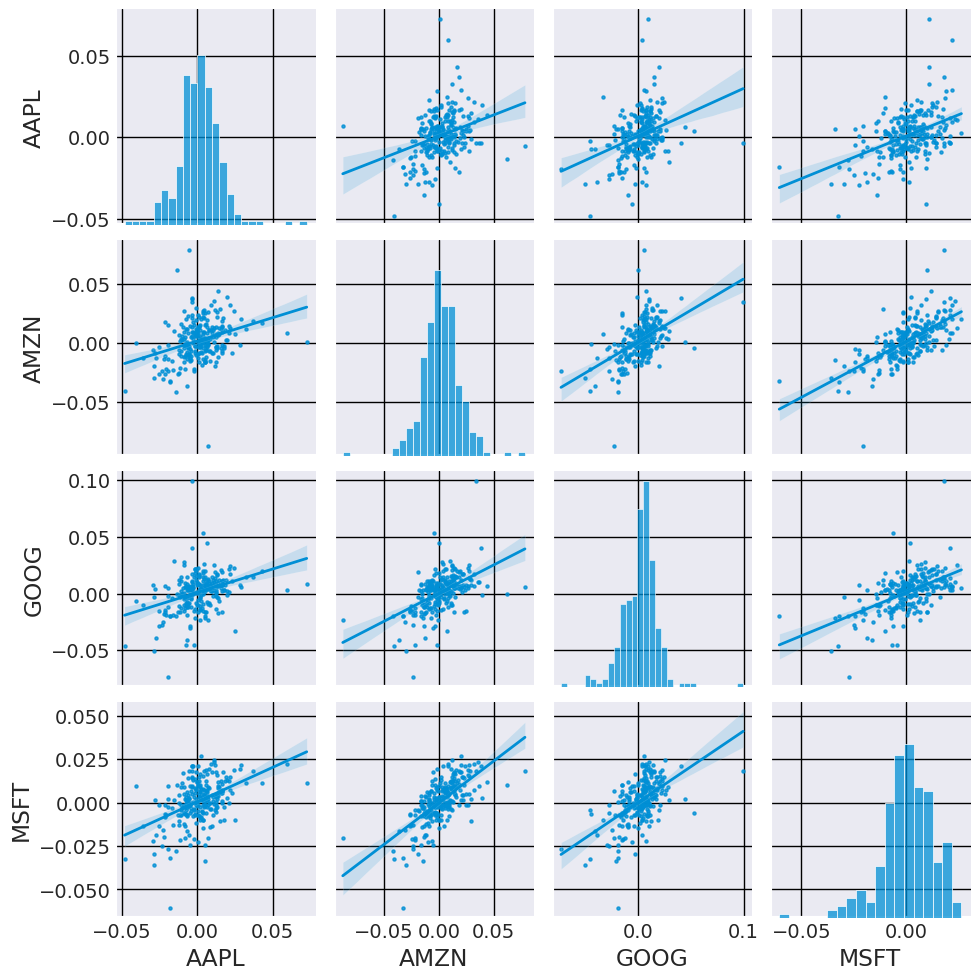

In [ ]:
g = sns.pairplot(tech_rets, kind='reg', height=2.5,
                plot_kws={'scatter_kws': {'s': 5}, 'line_kws': {'linewidth': 2}},
                diag_kind='hist')

for ax in g.axes.flat:  # Iterate over all axes in the pairplot
    ax.grid(True, color='black')  # Set grid properties

plt.show()

<Axes: xlabel='Ticker', ylabel='Ticker'>

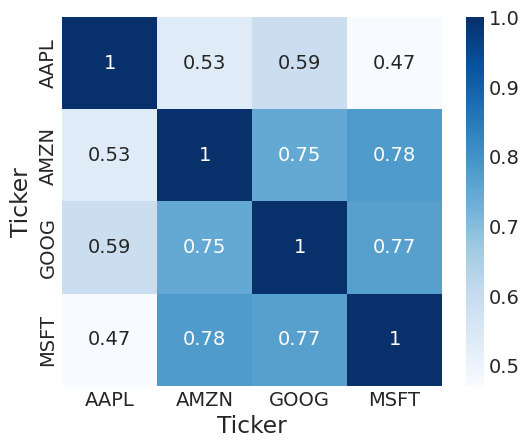

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='Blues')

## 4. Predicting the Closing Price of Amazon using CNN-LSTM



In [ ]:
# Get the stock quote
df = pdr.get_data_yahoo('AMZN', start='2012-01-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.794500,8.974000,8.777500,8.951500,8.951500,102216000
2012-01-04,8.960500,9.025000,8.803500,8.875500,8.875500,84104000
2012-01-05,8.797000,8.912500,8.702500,8.880500,8.880500,76182000
2012-01-06,8.903500,9.232500,8.875000,9.130500,9.130500,140168000
2012-01-09,9.138000,9.218500,8.850000,8.928000,8.928000,101138000
...,...,...,...,...,...,...
2024-12-04,215.960007,220.000000,215.750000,218.160004,218.160004,48745700
2024-12-05,218.029999,222.149994,217.300003,220.550003,220.550003,41140200
2024-12-06,220.750000,227.149994,220.600006,227.029999,227.029999,44178100


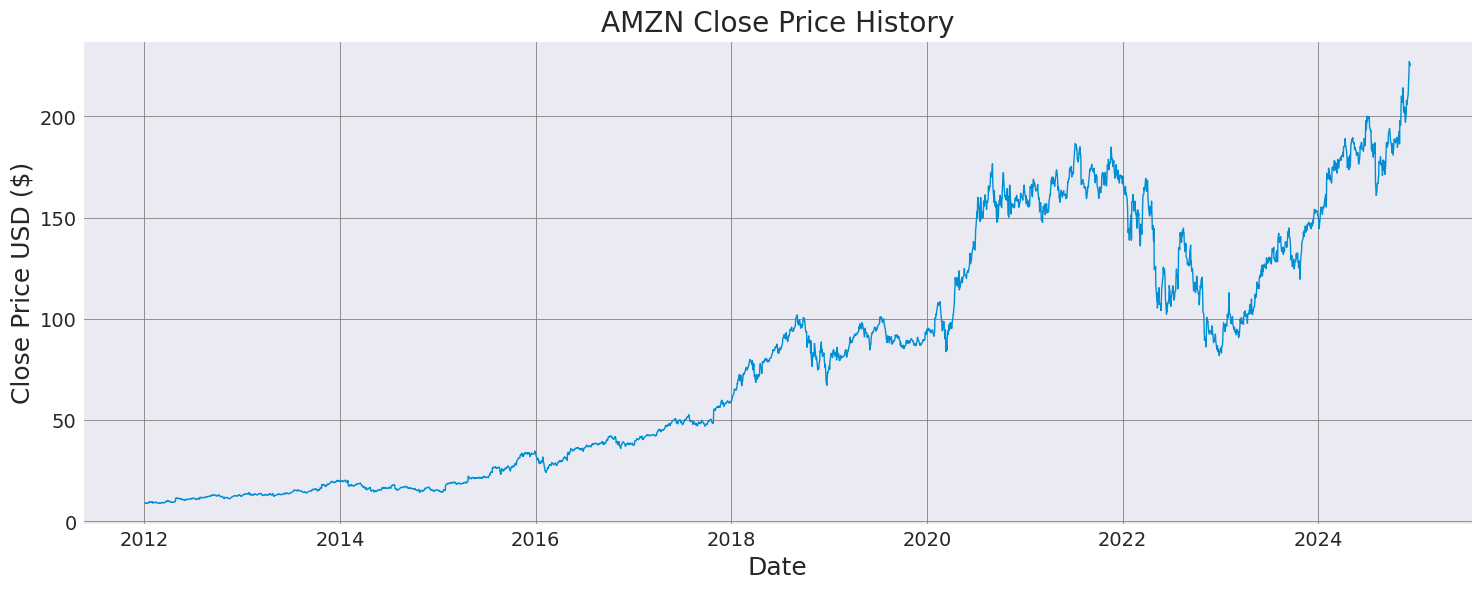

In [ ]:
plt.figure(figsize=(16, 6))
plt.title('AMZN Close Price History')
plt.grid(True, color='gray', linewidth=0.6)
plt.plot(df['Close'], linewidth=1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from keras.layers import Conv1D, Flatten

In [ ]:
from keras.layers import Bidirectional

In [ ]:
!pip install scikeras
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from keras.layers import Dropout

In [ ]:
# Preparing the data
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.95))

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
# Create the training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [ ]:
# Build the CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Flatten())
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.fit(x_train, y_train, batch_size=16, epochs=20)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - loss: 0.0420 - mae: 0.1152
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 145ms/step - loss: 0.0059 - mae: 0.0404
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - loss: 0.0060 - mae: 0.0384
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - loss: 0.0078 - mae: 0.0545
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.0029 - mae: 0.0268
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 251ms/step - loss: 0.0034 - mae: 0.0248
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0011 - mae: 0.0165
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - loss: 0.0031 - mae: 0.0289
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - loss: 0.0023 - mae: 0.0271
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0027 - mae: 0.0280
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - loss: 0.0016 - mae: 0.0193
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - loss: 0.0016 - mae: 0.0207
Epoch 13/20
57/57 

In [ ]:
# Prepare testing data
test_data = scaled_data[training_data_len - 60: , :]
x_test, y_test = [], dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
print("CNN-LSTM RMSE:", rmse)

CNN-LSTM RMSE: 2.983917541503906


In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-102-8f78faa8f9ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


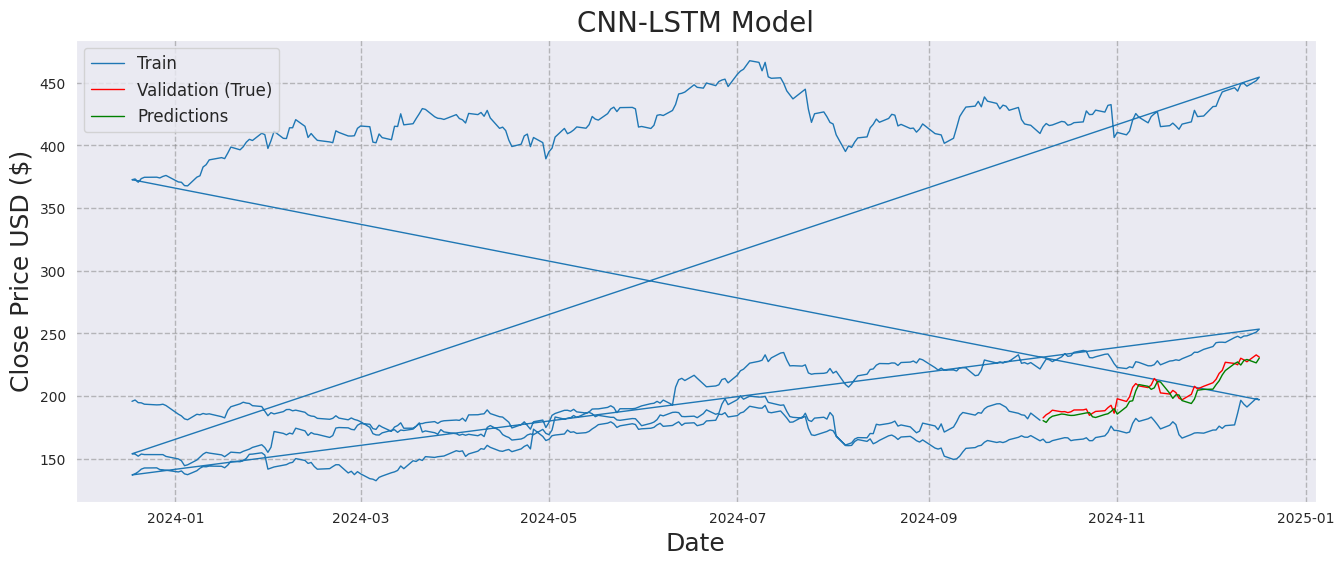

In [ ]:
# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('CNN-LSTM Model', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Customization
plt.grid(True, color='gray', linestyle='-', linewidth=1)
plt.plot(train['Close'],linewidth=1, label='Train')
plt.plot(valid['Close'], color='red', linewidth=1, label='Validation (True)')
plt.plot(valid['Predictions'], color='green', linewidth=1, label='Predictions')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2024-10-08,182.720001,180.504288
2024-10-09,185.169998,179.095978
2024-10-10,186.649994,182.312256
2024-10-11,188.820007,183.985077
2024-10-14,187.539993,185.760712
2024-10-15,187.690002,185.494934
2024-10-16,186.889999,184.929337
2024-10-17,187.529999,184.604111
2024-10-18,188.990005,184.715347


## 5. Predicted Values vs. Test Data

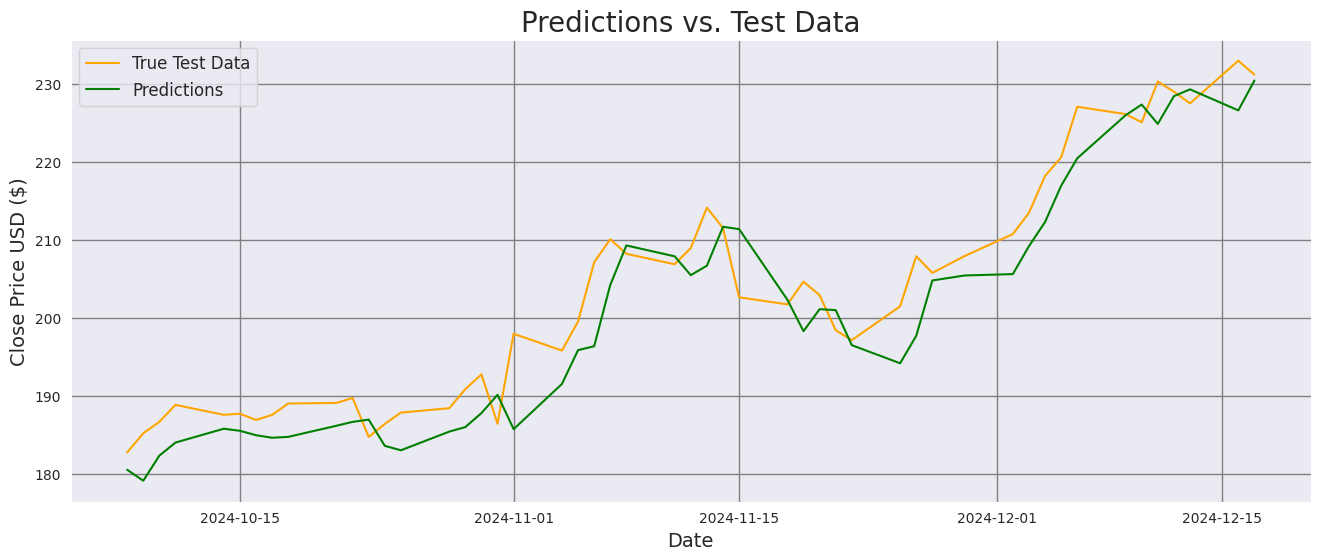

In [ ]:
# Plotting Predictions vs. True Test Data
plt.figure(figsize=(16, 6))
plt.title('Predictions vs. Test Data', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.plot(valid['Close'], color='orange', linewidth=1.5, label='True Test Data')
plt.plot(valid['Predictions'], color='green', linewidth=1.5, label='Predictions')

plt.grid(True, color='gray', linestyle='-', linewidth=1)
plt.legend(loc='upper left', fontsize=12)
plt.show()


## 6. Evaluating the Model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Categorize the actual and predicted stock prices
y_test_categorical = (y_test[1:] > y_test[:-1]).astype(int)
predictions_categorical = (predictions[1:] > predictions[:-1]).astype(int)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_categorical, predictions_categorical)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_categorical, predictions_categorical)
precision = precision_score(y_test_categorical, predictions_categorical)
recall = recall_score(y_test_categorical, predictions_categorical)
f1 = f1_score(y_test_categorical, predictions_categorical)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1 Score: {f1}")

Confusion Matrix:
[[ 6 13]
 [11 19]]
Accuracy: 0.5102040816326531
Precision: 0.59375
Recall (Sensitivity): 0.6333333333333333
F1 Score: 0.6129032258064516


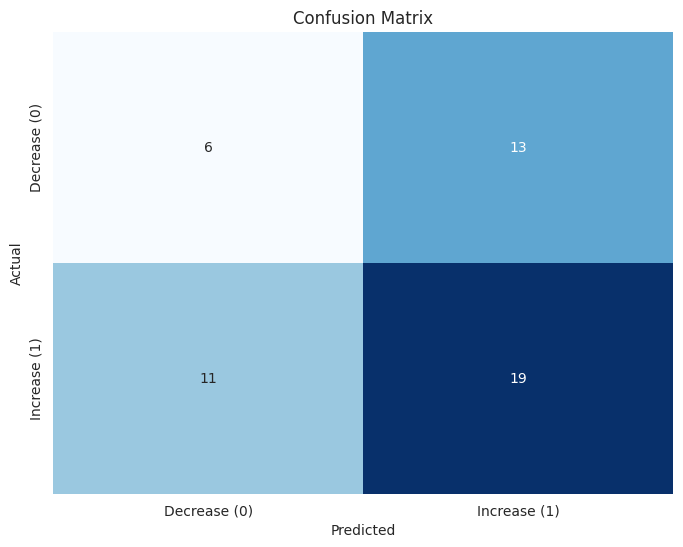

In [ ]:
from sklearn.metrics import confusion_matrix
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_categorical, predictions_categorical)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Decrease (0)', 'Increase (1)'],
            yticklabels=['Decrease (0)', 'Increase (1)'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## **Analysis**

---



The model demonstrates the ability to predict the positive class reasonably well (recall of 59.3%).
The precision and recall are balanced, as shown by the F1 Score.

The accuracy is barely above 50%, which might not be sufficient for a reliable prediction model.
A significant number of false positives (13) and false negatives (11) highlight the model's difficulty in correctly distinguishing between classes.

The model prioritizes capturing positive cases (higher recall), which may come at the cost of misclassifying negatives (false positives).
This behavior might be acceptable in scenarios where identifying positive cases (e.g., opportunities) is more important than avoiding false alarms.